# Prediction Using Unsupervised Machine Learning


#### Made By : Mayank Kirola (Data Science And Analytics Intern at The Sparks Foundation) #GRIPMAY2022

Here we are using K-Means Algorithm to Predict data.

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.

### Importing Statements

Mathplotlib - IT is used to plot graphs.

Kneed - We are using this library to find Elbow Point.

Sklearn (SciKit-Learn) - This library is the most useful liberary for machine learning in Python.

Pandas - Pandas is a library used to analyze data.

In [26]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
import pandas as pd

### Reading Data

Reading data from "Iris.csv" and assigning values to Variable x.

In [27]:
data = pd.read_csv("IRIS.CSV")

Checking the format of the data.

In [28]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
x = data.iloc[:, :-1].values

## Using Elbow Method

Using Elbow Method to find the Optimum Number of Clusters.


In [30]:
ww=[]
for i in range(1,15):
    kmeans = KMeans(init="random",n_clusters=i,n_init=1,max_iter=300,random_state=22)
    kmeans.fit(x)
    ww.append(kmeans.inertia_)

Ploting Graph using matplotlib.


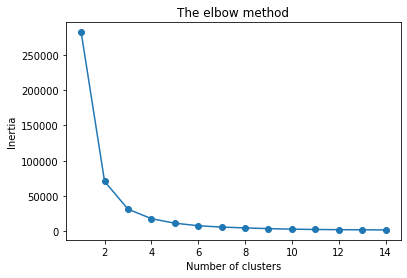

In [31]:
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.plot(range(1,15),ww)
plt.scatter(range(1,15),ww)

Using KneeLocator to find Optimum Number of clusters (Elbow Point)

In [32]:
elbow = KneeLocator(range(1, 15), ww, curve="convex", direction="decreasing").elbow
elbow

3

Using k-means algorithm on elbow (In This Case : 3) point.

In [33]:
kmeans = KMeans(init="random",n_clusters=elbow,n_init=10,max_iter=300,random_state=22)

Testing our Model on the given data.

In [34]:
pred = kmeans.fit_predict(x)

Ploting graph and creating Clusters using matplotlib.

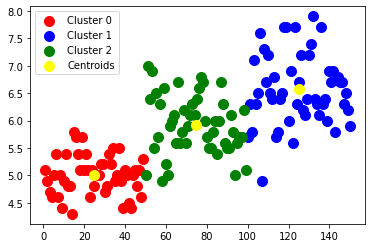

In [35]:
# Visualising the clusters - On the first two columns
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Cluster 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()